
# <center><u>  **3. Séries de Fourier** </u></center>
<br>

Assim como o $\mathbb R^n$, o espaço de funções periódicas de um determinado período formam um espaço vetorial (porém, de dimensão infinita). Nesse contexto, as séries de Fourier são uma maneira de escrever funções periódicas através de uma base de senos e cossenos, ou seja, de utilizar senóides para construir uma função periódica qualquer.

<br>

Iniciamos essa discussão com uma revisão sobre bases.

<br>

***
<br>

## <u>**Revisão: Bases**</u>
<br>

Lembremos que uma base para o espaço vetorial $\mathbb R^n$ é um conjunto de $n$ vetores

$$B = \{v_1, v_2, ..., v_n\}$$

que são <u>linearmente independentes</u> e <u>geram qualquer vetor</u> $u\in\mathbb R^n$ através de um combinação linear. Isto é, existem coeficientes $\alpha_1, \alpha_2, ..., \alpha_n\in\mathbb R$ tais que

$$
u = \alpha_1v_1+\alpha_2v_2+...+\alpha_nv_n.
$$

<br>

Uma base $B = \{v_1, v_2, ..., v_n\}$ é dita **ortogonal** se quaisquer dois de seus vetores são ortogonais, ou seja,

$$
\langle v_i, v_j \rangle = 0,\quad \forall i\neq j,
$$

onde $\langle\cdot,\cdot\rangle$ denota o **produto interno** do $\mathbb R^n$, definido por

$$
a=(a_1, a_2, ..., a_n), \ b=(b_1, b_2, ..., b_n) \implies \langle a, b\rangle = a_1b_1 + a_2b_2 + ... + a_nb_n.
$$

<br>

Em Python, esse produto interno é dado pelo comando `np.dot`.

<br>


### **Exercício 1**
Defina dois vetores $a, b\in\mathbb R^4$ que sejam ortogonais e confirme isso computacionalmente.


In [2]:
import numpy as np

In [3]:
# definindo os vetores a, b em R^4 como arrays
a = np.array([0, 1, 0, 0])
b = np.array([0, 0, 1, 0])

# confirmando que são ortogonais
np.dot(a, b)

0

<br>

## <u>**Bases ortonormais**</u>

Uma base $B = \{v_1, v_2, ..., v_n\}$ é dita **ortonormal** se, além de ortogonal, todos os seus vetores são unitários, isto é, possuem norma 1:

$$
||v_i|| = 1, \quad i=1, 2,...,n,
$$

onde a norma do vetor $a=(a_1, a_2, ..., a_n)$ é dada por $||a|| = \sqrt{a_1^2+a_2^2+...+a_n^2}$.

<br>

Computacionalmente, podemos usar o comando `np.linalg.norm` para calcular a norma de um vetor.

<br>

### **Exercício 2**

Verifique que a base do $\mathbb R^3$ definida por
$$B_2 = \Big\{\left(\frac{1}{3}, \frac{-2}{3}, \frac{2}{3}\right), \left(0, \frac{1}{\sqrt2}, \frac{1}{\sqrt2}\right), \left(\frac{-4}{\sqrt{18}}, \frac{-1}{\sqrt{18}}, \frac{1}{\sqrt{18}}\right)\Big\}$$
é uma base ortonormal, imprimindo as informações relevantes.

In [11]:
b20 = np.array([1/3, -2/3, 2/3])
b21 = np.array([0, 1/np.sqrt(2), 1/np.sqrt(2)])
b22 = np.array([-4/np.sqrt(18), -1/np.sqrt(18), 1/np.sqrt(18)])

# norma
print(np.sqrt(np.sum(b20**2))) #  ou np.linalg.norm
print(np.sqrt(np.sum(b21**2)))
print(np.sqrt(np.sum(b22**2)))

1.0
0.9999999999999999
1.0


<br>

## <u>**Coordenadas com relação a uma base ortonormal**</u>

Uma das grandes vantagens de se trabalhar com uma base ortonormal é que as coordenadas com relação a essa base são facilmente obtidas.

Lembre que as coordenadas do vetor $u\in\mathbb R^n$ com relação à base $B=\{v_1,v_2,...,v_n\}$ são precisamente os coeficientes obtidos quando escrevemos $u$ como combinação linear de $v_1,..., v_n$:

$$
(u)_B = \begin{pmatrix}\alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_n\end{pmatrix}
\quad \Leftrightarrow \quad u = \alpha_1v_1 + \alpha_2v_2 + ... + \alpha_n v_n.
$$

Caso $B=\{v_1, v_2,...,v_n\}$ seja uma base <u>ortonormal</u>, as coordenadas são simplesmente dadas por

$$
\alpha_i = \langle u, v_i \rangle,\quad\quad i=1,...,n.
$$

<br>

### **Exercício 3**

Determine as coordenadas do vetor $$w = (-2, \pi, \sqrt{5})$$ com relação à base $B_2$, definida no Exercício 2. Mostre que de fato os coeficientes $\alpha_i$ encontrados satisfazem $$w = \alpha_1v_1 + \alpha_2v_2 + \alpha_3v_3,$$ onde $v_i$ são os vetores de $B_2$.

In [14]:
# Como B2 é base ortonormal, fazemos o produto interno

w = np.array([-2, np.pi, np.sqrt(5)])

alpha0 = np.dot(b20, w)
alpha1 = np.dot(b21, w)
alpha2 = np.dot(b22, w)

alpha0, alpha1, alpha2

(-1.270349784060002, 3.8025802991633726, 1.6721838701657956)

In [15]:
# verificação

print(alpha0*b20 + alpha1*b21 + alpha2*b22)

[-2.          3.14159265  2.23606798]


<br><br>

***
***
***

<br><br>

# <center><u>**Espaços vetoriais de funções**</u></center>
<br>

Espaços vetoriais é um conceito matemático que se estende para além de $\mathbb R^n$: é uma estrutura algébrica que se refere a um conjunto munido de uma operação de soma e uma operação de multiplicação por escalar.

Ou seja, <u>existem espaços vetoriais mais abstratos</u>, como por exemplo o **espaço vetorial das funções polinomiais de grau $\leq5$**. As funções desse espaço vetorial são da forma

$$
f(x) = a_0 + a_1x +a_2x^2 +a_3x^3 +a_4x^4 +a_5x^5.
$$

Note que uma base para esse espaço é dada pelo conjunto de funções

$$
\{1, x, x^2,  x^3,  x^4,  x^5\}.
$$

<br>

O **produto interno usual** entre duas funções reais $g_1, g_2$ contínuas no intervalo $[a, b]$ é dado por
$$
\langle g_1, g_2 \rangle = \int_{a}^b{g_1(x)g_2(x)dx}.
$$

<br>

<u>Lembrando</u>: Podemos calcular integrais com a biblioteca simbólica SymPy como no exemplo abaixo, onde $f(x)=x^2$ e $[a, b] = [-1, 1]$.


In [16]:
# exemplo de integral resolvida computacionalmente

import sympy as sp
sp.init_printing()                  # modo de impressão

x = sp.symbols('x')                 # definindo x como variável simbólica
sp.integrate(x**2, (x, -1, 1))      # integrande a função x**2, na variável x, entre -1 e 1

<br>

### **Exercício 4**

Mostre que as funções polinomiais $$f(x)=2x^3 + 5x^7$$ $$g(x) = x^4-3x^2$$ são ortogonais, considerando o intervalo $[a, b] = [-1,1]$.


In [18]:
import sympy as sp

x = sp.symbols('x') # variável simbólica

fx = 2*x**3 + 5*x**7
gx = x**4 - 3*x**2

sp.integrate(fx*gx, (x, -1, 1))

<br>

***
<u>**Desafio:**</u> Como generalizar o exemplo acima, obtendo uma condição suficiente para que duas funções polinomiais no intervalo $[-1, 1]$ sejam ortogonais?
***

<br>

_Tentativa_: Sejam 

$$f(x) = \sum_{i=0}^{m} a_i x^i $$
$$g(x) = \sum_{j=0}^{n} b_j x^j $$

polinômios reais genéricos. Queremos calcular

$$ 
\int_{-1}^{1} f(x)g(x) dx = 0
$$

Substituindo $f(x)$ e $g(x)$

$$
\begin{align*}
\int_{-1}^{1} f(x)g(x) dx & = \int_{-1}^{1} \sum_{i=0}^{m} \sum_{j}^{n} a_ib_j x^{i+j} dx \\ 
& = \sum_{i=0}^{m}\sum_{j=0}^{n}a_ib_j \int_{-1}^{1} x^{i+j}dx 
\end{align*}
$$
Para avaliarmos a integral, fazemos $i+j = k$ e obtemos

$$
\int_{-1}^{1} x^{k} dx = \frac{x^{k + 1}}{k+1}\bigg|_{-1}^{1} = \frac{1^{k+1} - (-1)^{k+1}}{k+1} = \frac{1 - (-1)^{k+1}}{k+1}
$$

Ou seja, o resultado da integral depende da paridade do valor de $k$. 

Se $k=2n+1$ (ímpar), temos $1 - (-1)^{2n + 1 + 1} = 1 - (-1)^{2n + 2} = 1 - 1 = 0 $ e a integral será igual a zero. Isto é, a paridade da função será ímpar e a integral será nula devido a simetria.

Se $k = 2n$, temos

$$
\frac{1 - (-1)^{k+1}}{k+1} = \frac{1 - (-1)^{2n + 1}}{2n + 1} = \frac{1 - (-1)}{2n + 1} = \frac{2}{2n + 1} = \frac{2}{k + 1}
$$

Isto é, se $k$ é par, temos uma função par e a integral poderia ser avaliada na forma

$$
\int_{-1}^{1} x^k dx = 2 \int_{0}^{1} x^k dx 
$$


Resumindo

$$
\begin{cases}
k \text{ ímpar} \Rightarrow \int_{-1}^{1} x^{k} dx = 0 \\ 
k \text{ par} \Rightarrow \int_{-1}^{1} x^{k} dx = \frac{2}{k + 1}
\end{cases}
$$


Assim, para todo $k = i + j$ ímpar, temos que  

$$
\int_{-1}^{1} f(x)g(x)dx = 0 
$$

e serão ortogonais. 

Para $k = i + j$ par, temos que 


$$
\sum_{i = 0}^{m}\sum_{j = 0}^{m} a_i b_j \cdot \left(\frac{2}{i + j + 1} \right) = 0
$$

ou 

$$
\boxed{\sum_{\substack{i = 0,\\ j = 0 \\ i + j \text{ par}}}^{m, n} a_ib_j \cdot  \left(\frac{2}{i + j + 1} \right) = 0}
$$

<br>

### **Exercício 5**
Fixado $L\in\mathbb R$, $L\neq0$, mostre que

$$
\Big\{\cos\Big(\frac{\pi x}{L}\Big), \sin\Big(\frac{\pi x}{L}\Big),\cos\Big(\frac{2\pi x}{L}\Big), \sin\Big(\frac{2\pi x}{L}\Big)\Big\}
$$

é um conjunto **ortogonal** no intervalo $[a,b]=[-L, L]$. (Note que é possível definir $L$ como uma variável não-nula e real com o comando `L = sp.symbols('L', real=True, nonzero=True)`.)

<br>

Além disso, responda: para cada função $g$ desse conjunto, quanto vale $\langle g, g \rangle$?

In [ ]:
# símbolos
x, L = sp.symbols('x L', real=True, nonzero=True)

# base (conjunto ortogonal)
base = [sp.cos(sp.pi*x/L), sp.sin(sp.pi*x/L), sp.cos(2*sp.pi*x/L), sp.sin(2*sp.pi*x/L)]

# ortogonalidade
for i, f in enumerate(base): 
    for j, g in enumerate(base):
        integral = sp.simplify(sp.integrate(f*g, (x, -L, L)))
        if i != j: # valores distintos do conjunto
            print(f"<f_{i+1}, f_{j + 1}> = {integral}")

<f_1, f_2> = 0
<f_1, f_3> = 0
<f_1, f_4> = 0
<f_2, f_1> = 0
<f_2, f_3> = 0
<f_2, f_4> = 0
<f_3, f_1> = 0
<f_3, f_2> = 0
<f_3, f_4> = 0
<f_4, f_1> = 0
<f_4, f_2> = 0
<f_4, f_3> = 0


In [26]:
# valores de <g, g>

for i, f in enumerate(base):
    integral = sp.simplify(sp.integrate(f*f, (x, -L, L)))
    print(f"<f_{i+1}, f_{i+1}> = {integral}")

<f_1, f_1> = L
<f_2, f_2> = L
<f_3, f_3> = L
<f_4, f_4> = L


Ou seja, o conjunto é ortogonal, mas não é normalizado (ortonormal): $\|f \| = \sqrt{\braket{f, f}} = \sqrt{\int_{a}^{b}f(x)^2 dx }$. Dividindo a base pela norma $(\sqrt{L})$, temos

In [31]:
base_norm = [f/sp.sqrt(L) for f in base]

for i, f in enumerate(base_norm):
    integral = sp.simplify(sp.integrate(f*f, (x, -L, L)))
    print(f"<f_{i+1}, f_{i+1}> = {integral}")

<f_1, f_1> = 1
<f_2, f_2> = 1
<f_3, f_3> = 1
<f_4, f_4> = 1


***

## <u>**Séries de Fourier**</u>

O objetivo do exercício anterior é nos convencer de que o conjunto de funções

$$
\Big\{\cos\Big(\frac{n\pi x}{L}\Big);\ n=0, 1, 2,...\Big\}⋃\Big\{\sin\Big(\frac{m\pi x}{L}\Big);\ m=1, 2, 3,...\Big\}
$$

tem a propriedade de que para quaisquer duas funções $g_1, g_2$ desse conjunto, vale que

$$
\langle g_1, g_2 \rangle = \begin{cases}0\ \text{ se } g_1\neq g_2 \\ L\ \text{ se } g_1=g_2\end{cases}.
$$

Note que, para $n=0$, a função $\cos\Big(\frac{n\pi x}{L}\Big) = \cos(0) = 1$ é a função constante igual a $1$.

<br><br>

Ou seja, as funções $\cos\Big(\frac{n\pi x}{L}\Big), \sin\Big(\frac{m\pi x}{L}\Big)$, com $n=0, 1, 2,...$ e $m=1, 2, 3,...$ <u>formam uma base ortogonal</u> (que é até ortonormal, se $L=1$) para o espaço de funções periódicas de período $L$.

<br>

Assim, é possível mostrar que se $f$ é uma função periódica de período $L$, então $f$ pode ser escrita como combinação linear dessas funções:

$$
f(x) = \frac{a_0}{2} + \sum\limits_{n=1}^\infty\Big[a_n\cos\Big(\frac{n\pi x}{L}\Big) +b_n\sin\Big(\frac{n\pi x}{L}\Big)\Big],
$$

para algum conjunto de coeficientes $a_n, b_n$.

<br><br>

***

## **Determinando os coeficientes de Fourier**

Para determinar $a_n, b_n$, vamos utilizar as relações de ortogonalidade entre as funções $\cos\Big(\frac{n\pi x}{L}\Big), \sin\Big(\frac{m\pi x}{L}\Big)$.

Assumindo que $f(x)$ é descrita por sua série de Fourier, temos

$$
f(x) = \frac{a_0}{2} + \sum\limits_{n=1}^\infty\Big[a_n\cos\Big(\frac{n\pi x}{L}\Big) +b_n\sin\Big(\frac{n\pi x}{L}\Big)\Big].
$$

<br>

Fixando $m\in\mathbb N$ e multiplicando ambos os lados da equação anterior por $\color{blue}{\cos\Big(\frac{m\pi x}{L}\Big)}$, obtemos

$$
f(x)\color{blue}{\cos\Big(\frac{m\pi x}{L}\Big)} = \frac{a_0}{2}\color{blue}{\cos\Big(\frac{m\pi x}{L}\Big)} + \sum\limits_{n=1}^\infty\Big[a_n\cos\Big(\frac{n\pi x}{L}\Big)\color{blue}{\cos\Big(\frac{m\pi x}{L}\Big)} +b_n\sin\Big(\frac{n\pi x}{L}\Big)\color{blue}{\cos\Big(\frac{m\pi x}{L}\Big)}\Big].
$$

<br>

Integrando ambos os lados de $-L$ a $L$, e assumindo que a série pode ser integrada termo a termo (o que NÃO é óbvio), obtemos

\begin{align}
\int_{-L}^L \left[ f(x){\cos\Big(\frac{m\pi x}{L}\Big)}\right] dx=&\ \ \frac{a_0}{2} \int_{-L}^L \left[ \cos\Big(\frac{m\pi x}{L}\Big) \right]dx\\ &+ \sum\limits_{n=1}^\infty  a_n  \int_{-L}^L \left[ \cos\Big(\frac{n\pi x}{L}\Big){\cos\Big(\frac{m\pi x}{L}\Big)}\right]dx\\ &+\sum\limits_{n=1}^\infty b_n\int_{-L}^L \left[\sin\Big(\frac{n\pi x}{L}\Big){\cos\Big(\frac{m\pi x}{L}\Big)}\right]dx.
\end{align}

<br>

Vejamos as integrais do lado direito da última equação:
- $\int_{-L}^L \left[ \cos\Big(\frac{m\pi x}{L}\Big) \right]dx$ é igual a 0, pois $\cos\Big(\frac{m\pi x}{L}\Big)$ é uma função cosseno de período $2L$ (se $m\neq 0$) integrada em um intervalo de comprimento $2L$;
- por ortogonalidade, $\int_{-L}^L \left[ \cos\Big(\frac{n\pi x}{L}\Big){\cos\Big(\frac{m\pi x}{L}\Big)}\right]dx$ não se anula apenas se $m=n$, e nesse caso é igual a $L$;
- por ortogonalidade, $\int_{-L}^L \left[\sin\Big(\frac{n\pi x}{L}\Big){\cos\Big(\frac{m\pi x}{L}\Big)}\right]dx=0$, para todo $n\in\mathbb N$.

<br>

Assim, concluímos que

$$
\int_{-L}^L \left[ f(x){\cos\Big(\frac{n\pi x}{L}\Big)}\right] dx= a_n L,
$$

ou, equivalentemente,

$$
a_n = \frac{1}{L} \int_{-L}^L \left[ f(x){\cos\Big(\frac{n\pi x}{L}\Big)}\right] dx, \quad \quad n=1, 2, 3...
$$

(Podemos mostrar que a fórmula acima também determina $a_0$, isto é, também vale para $n=0$.)

<br>

Por um argumento análogo, multiplicando a série de Fourier por $\color{blue}{\sin\Big(\frac{m\pi x}{L}\Big)}$ e desenvolvendo, as relações de ortogonalidade nos levam a

$$
b_n = \frac{1}{L} \int_{-L}^L \left[ f(x){\sin\Big(\frac{n\pi x}{L}\Big)}\right] dx\quad \quad n=1,2,3...
$$

<br>

Com essas fórmulas, ficam determinados os coeficientes da série de Fourier da função $f$.

<br><br>

### **Exercício 6**

O código abaixo define uma função $f$ de período $2\pi$ e mostra o seu gráfico. Calcule os primeiros termos da série de Fourier de $f$ e plote o gráfico da série truncada em $n=3$, juntamente com o gráfico de $f$.

<u>Atenção:</u> Para integrar uma função $f$ definida por partes, às vezes será necessário dividir a integral em duas:

$$
\int_{-L}^L f(x)dx = \int_{-L}^0 f(x)dx + \int_0^L f(x)dx
$$

In [4]:
import matplotlib.pyplot as plt
import numpy as np

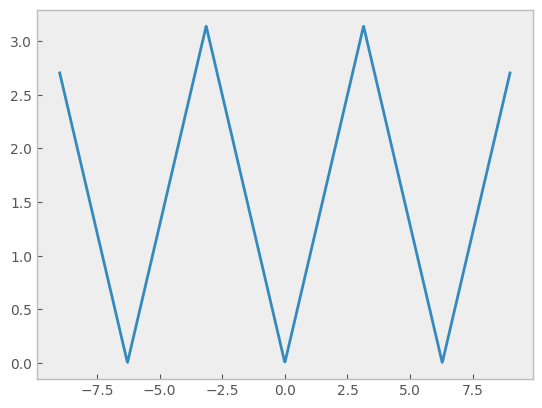

In [48]:
def f6(x):
    if 0 <= x < np.pi:
        return x
    elif -np.pi <= x < 0:
        return -x
    elif x < -np.pi:
        return f6(x + 2*np.pi)
    else:
        return f6(x - 2*np.pi)


plt.style.use("bmh")
x = np.linspace(-9, 9, 1000)
plt.plot(x, [f6(xi) for xi in x])
plt.grid()
plt.show()

Função módulo:

$$
f_6(x) = 
\begin{cases} 
-x, \space -\pi \leq x < 0 \\ 
x, \space 0 \leq x \leq \pi
\end{cases}
$$

Série de Fourier truncada (n=3):


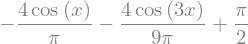

In [ ]:
# símbolos
sp.init_printing()
x = sp.symbols('x')

# Para realizar a integração, abrimos a função em domínios
f6_partes = sp.Piecewise(
    (-x, x < 0), 
    (x, (0 <= x) & (x <= sp.pi))
)

# meio período
L = sp.pi

# coeficiente a_0
a0 = (1/L) * sp.integrate(f6_partes, (x, -L, L))/2

# Série
Y = 0
for n in range (1, 4):
    an = (1/L) * sp.integrate(f6_partes*sp.cos(n*x), (x, -L, L))
    bn = (1/L) * sp.integrate(f6_partes * sp.sin(n*x), (x, -L, L))
    Y += an * sp.cos(n*x) + bn * sp.sin(n*x)
    
    
# série total
Y = a0 + Y
print("Série de Fourier truncada (n=3):")
Y

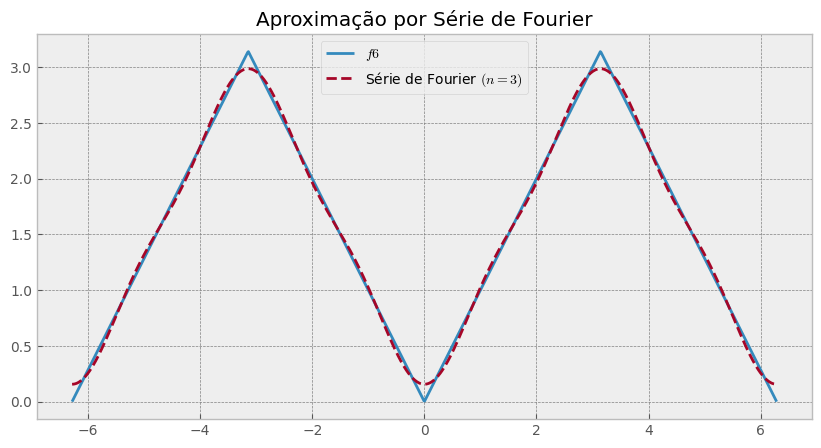

In [ ]:
# Gráfico

# passagem para numérico

f_fourier = sp.lambdify(x, Y, 'numpy') # converte pra função numérica
x_vals = np.linspace(-2*np.pi, 2*np.pi, 1000) # [-2\pi, 2\pi]
f_vals = [f6(xi) for xi in x_vals]
fs_vals = f_fourier(x_vals)

# plot
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals, label = "$f6$", linewidth = 2)
plt.plot(x_vals, fs_vals, label = "Série de Fourier $(n = 3)$", linestyle = '--', linewidth = 2)
plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
plt.title("Aproximação por Série de Fourier")
plt.legend()
plt.show()

<br><br>

### **Exercício 7**

Analogamente ao exercício anterior, aproxime a função dada abaixo por sua série de Fourier, utilizando uma aproximação com $n=8$ termos.

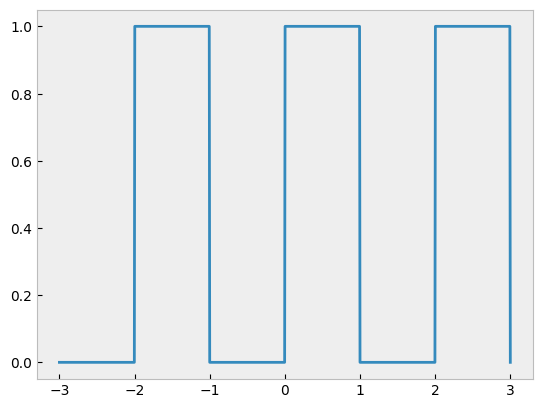

In [71]:
def f7(x):
    if 0 <= x < 1:
        return 1
    elif 1 <= x <= 2:
        return 0
    elif x < 0:
        return f7(x + 2)
    else:
        return f7(x - 2)

x = np.linspace(-3, 3, 1000)
plt.plot(x, [f7(xi) for xi in x])
plt.grid()
plt.show()

In [72]:
# símbolos
x, n = sp.symbols('x n')

# meio período
L = 1

# definição símbólica
f7_partes = sp.Piecewise(
    (1, (0 <= x) & (x < 1)), 
    (0, (-1 <= x) & (x < 0))
)

# a0
a0 = (1/L) * sp.integrate(f7_partes, (x, -L, L))/2

# série 
N = 8
serie = a0
for k in range(1, N + 1):
    an = (1/L) * sp.integrate(f7_partes * sp.cos(k*sp.pi * x/L), (x, -L, L))
    bn = (1/L) * sp.integrate(f7_partes * sp.sin(k*sp.pi * x/L), (x, -L, L))
    serie += an * sp.cos(k * sp.pi * x/L) + bn * sp.sin(k*sp.pi*x/L)
    

serie

2.0*sin(pi*x)/pi + 0.666666666666667*sin(3*pi*x)/pi + 0.4*sin(5*pi*x)/pi + 0.285714285714286*sin(7*pi*x)/pi + 0.5

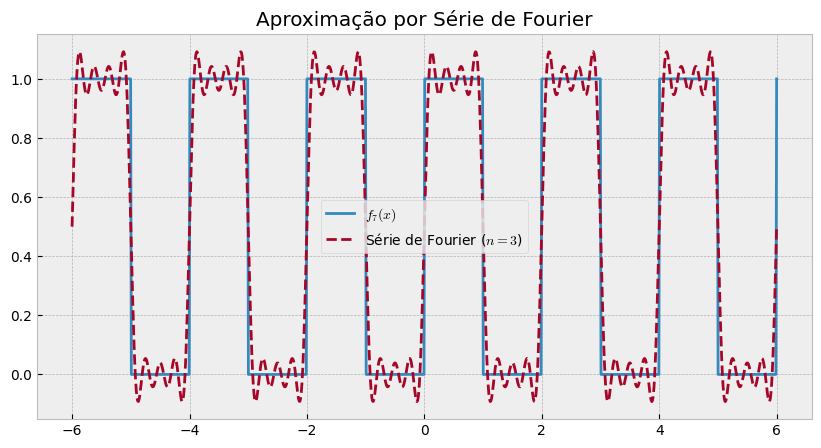

In [ ]:
# gráfico
fs = sp.lambdify(x, serie, 'numpy')

# passa os valores da função para vetores numpy
f7_vec = np.vectorize(f7)

# avaliação numérica
x_vals = np.linspace(-6, 6, 1000)
f_vals = f7_vec(x_vals) # função f(x)
fs_vals = fs(x_vals) # série de fourier

plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals, label="$f_7(x)$", linewidth=2)
plt.plot(x_vals, fs_vals, label="Série de Fourier ($n = 3$)", linestyle='--', linewidth=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Aproximação por Série de Fourier")
plt.legend()
plt.show()

<br><br>

## **Exercício 8**

a) Utilizando as funções `ext_par` e `ext_impar` das aulas passadas, construa as extensões periódicas par e ímpar da função $f_8(x) = |x^2-3x+2|$ definida no intervalo $[0, 2]$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# extensão par (usando vetores para usar com matplotlib)

def ext_par(f, L):
    def f_ext(x_array):
        result = []
        for x in x_array:
            # Reduz x para o intervalo [-L, L]
            while x > L:
                x -= 2 * L
            while x < -L:
                x += 2 * L

            # Aplica simetria par
            if x > 0:
                result.append(f(x))
            elif x < 0:
                result.append(f(-x))
            else:
                result.append(0)
        return np.array(result)
    return f_ext

# extensão ímpar (usando vetores para usar com matplotlib)
def ext_impar(f, L):
    def f_ext(x_array):
        result = []
        for x in x_array:
            # Reduz x para o intervalo [-L, L]
            while x > L:
                x -= 2 * L
            while x < -L:
                x += 2 * L

            # Aplica simetria ímpar
            if x > 0:
                result.append(f(x))
            elif x < 0:
                result.append(-f(-x))
            else:
                result.append(0)
        return np.array(result)
    return f_ext

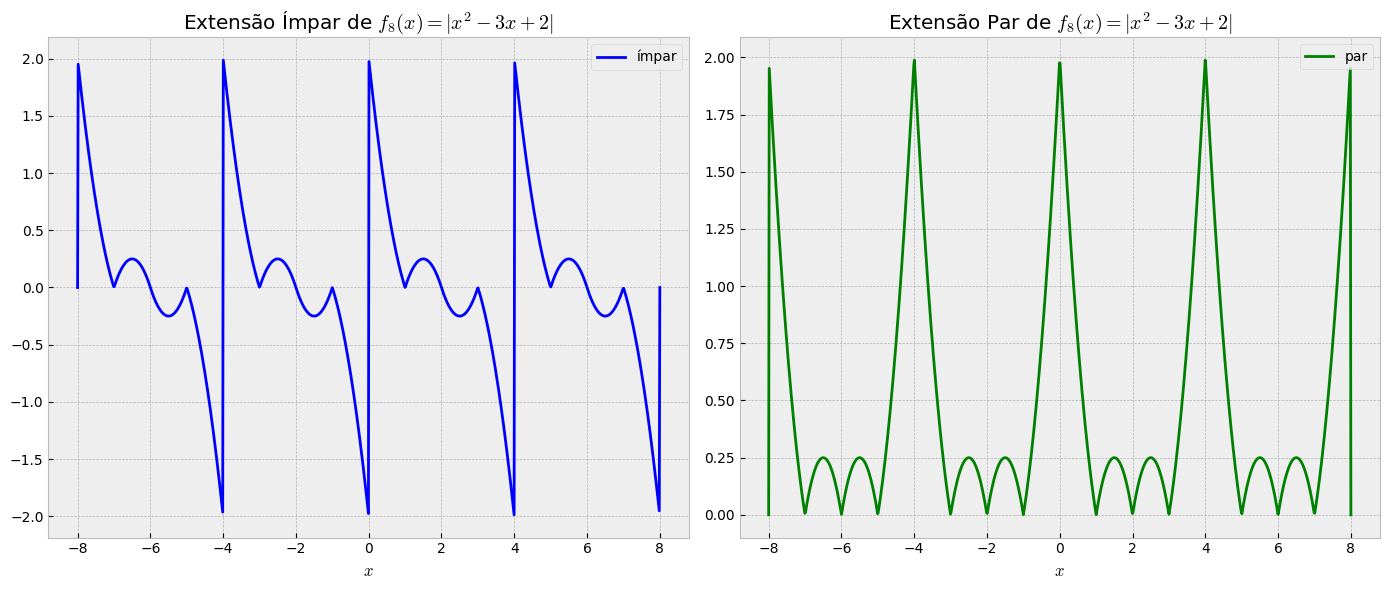

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define a função original f_8
def f8(x):
    return abs(x**2 - 3*x + 2)

# Intervalo de avaliação
L = 2

x_vals = np.linspace(-8, 8, 1000)
f8_par = ext_par(f8, L) # calcula extensão par
f8_impar = ext_impar(f8, L) # calcula extensão ímpar

# Avaliação
y_par = f8_par(x_vals)
y_impar = f8_impar(x_vals)

# Plotagem das extensões
plt.figure(figsize=(14, 6))
plt.style.use("bmh")

plt.subplot(1, 2, 1)
plt.plot(x_vals, y_impar, label='ímpar', color='blue', linewidth=2)
plt.title('Extensão Ímpar de $f_8(x) = |x^2-3x+2|$')
plt.xlabel('$x$')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_vals, y_par, label='par', color='green', linewidth=2)
plt.title('Extensão Par de $f_8(x) = |x^2-3x+2|$')
plt.xlabel('$x$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


<br>

b) Construa aproximações das extensões acima usando séries de Fourier com $n=8$ termos, plotando conjuntamente todos os gráficos relevantes no intervalo $[-8, 8]$.

In [48]:
import sympy as sp

N = 8 # número de termos

# variável simbólica
x = sp.Symbol('x')
f8_sym = sp.Abs(x**2 - 3*x + 2)

In [49]:
# Função para calcular a série

def serie_fourier(f_sym, L, N):
    x = sp.symbols('x')
    a0 = (1 / L) * sp.integrate(f_sym, (x, -L, L))
    serie = a0 / 2

    for n in range(1, N + 1):
        an = (1 / L) * sp.integrate(f_sym * sp.cos(n * sp.pi * x / L), (x, -L, L))
        bn = (1 / L) * sp.integrate(f_sym * sp.sin(n * sp.pi * x / L), (x, -L, L))
        serie += an * sp.cos(n * sp.pi * x / L) + bn * sp.sin(n * sp.pi * x / L)

    return serie

In [ ]:
# definição simbólica das funções em [-L, L] - para realizar a integral dentro dos limites certos

f8_par_partes = sp.Piecewise(
    (f8_sym.subs(x, -x), (x < 0) & (x >= -L)), # x \in [-L, 0), substitui x por -x (simetria par)
    (f8_sym, (x >= 0) & (x <= L)) # x \in [0, L], mantém f_8(x) - função base no intervalo [0, 2]
)

f8_impar_partes = sp.Piecewise(
    (-f8_sym.subs(x, -x), (x < 0) & (x >= -L)), # x \in [-L, 0), inverte o valor da função espelhada
    (f8_sym, (x >= 0) & (x <= L)) # x \in [0, L], mantém f_8(x) - função base no intervalo [0, 2]
)

serie_par = serie_fourier(f8_par_partes, L, N)
serie_impar = serie_fourier(f8_impar_partes, L, N)

# converte para númerico
serie_par_func = sp.lambdify(x, serie_par, 'numpy')
serie_impar_func = sp.lambdify(x, serie_impar, 'numpy')

Definições das extensões dentro do intervalo $[-L, L]$:

$$
f_{\text{par}} = 
\begin{cases} 
f(x), \hspace{0.4cm} x \in [0, L] \\ 
f(-x), \hspace{0.4cm} x\in [-L, 0)
\end{cases}
$$


$$
f_{\text{ímpar}} = 
\begin{cases}
f(x), \hspace{0.4cm} x \in [0, L] \\ 
-f(-x), \hspace{0.4cm} x \in [-L, 0)
\end{cases}
$$

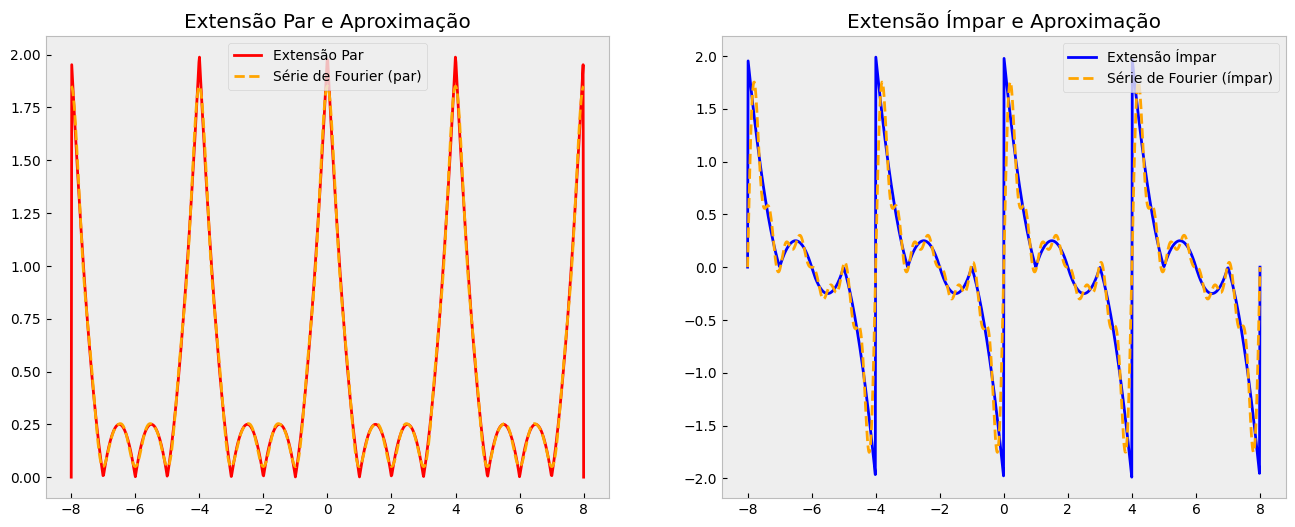

In [55]:
# Gráfico

x_vals = np.linspace(-8, 8, 1000)
y_ext_par = f8_par(x_vals) # calcula a extensão da função par
y_ext_impar = f8_impar(x_vals) # calcula a extensão função ímpar
y_serie_par = serie_par_func(x_vals) # calcula a aprox par
y_serie_impar = serie_impar_func(x_vals) # calcula a aprox ímpar

plt.style.use("bmh")
plt.figure(figsize=(16, 6))

# Extensão par e sua série
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_ext_par, label="Extensão Par", color='red')
plt.plot(x_vals, y_serie_par, '--', label="Série de Fourier (par)", color='orange')
plt.title("Extensão Par e Aproximação")
plt.grid()
plt.legend()

# Extensão ímpar e sua série
plt.subplot(1, 2, 2)
plt.plot(x_vals, y_ext_impar, label="Extensão Ímpar", color='blue')
plt.plot(x_vals, y_serie_impar, '--', label="Série de Fourier (ímpar)", color='orange')
plt.title("Extensão Ímpar e Aproximação")
plt.grid()
plt.legend()